<a href="https://colab.research.google.com/github/felixn95/oil-palm-detection/blob/main/data_processing/Exploration_Confidence_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deforestation through Oil Palm Plantation

## Palm Oil
Palm oil, derived from the fruit of the oil palm tree, has become a ubiquitous and versatile vegetable oil with a significant presence in our daily lives.

Renowned for its high productivity and versatility in various industries, palm oil has become a key ingredient in a wide array of consumer products, ranging from food items to cosmetics and biofuels.


## Oil Palm Plantation
Therefore, the cultivation of oil palm, a versatile and high-yielding crop, has witnessed exponential growth in recent decades, especially in tropical regions.

This surge in demand for palm oil has led to large-scale clearing of forests to make way for vast monoculture plantations.



While on the one hand, the demand for palm oil provides valuable jobs, it also has led to deforestation, increased carbon emissions, and biodiversity loss.

## Motivation

Considering the economic well-being of millions and the delicate ecosystems of tropical regions, the challenge lies in devising cost-effective, timely, and scalable approaches to tackle the global expansion and sustainable management of oil palm cultivation.

A promising avenue involves leveraging high-resolution satellite imagery, a consistently updated and precise global data source. When paired with advanced computer vision algorithms, this technology holds the potential for automating the mapping of oil palm plantations. Such automation represents a crucial stride in comprehending the worldwide impact of palm oil cultivation

## Preprocessing & Explorative Data Analysis (EDA)

In [1]:
!pip install data-gradients --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.5/459.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.3/108.3 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.2/433.2 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
import data_gradients
import torchvision

That all the team members & others have access to the dataset, we hosted it on Github (LFS)

In [3]:
# load data set & unzip

!wget https://github.com/felixn95/tds_project/raw/main/wisdatathon2019.zip

--2024-01-28 15:45:18--  https://github.com/felixn95/tds_project/raw/main/wisdatathon2019.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/felixn95/tds_project/main/wisdatathon2019.zip [following]
--2024-01-28 15:45:18--  https://media.githubusercontent.com/media/felixn95/tds_project/main/wisdatathon2019.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 483449080 (461M) [application/zip]
Saving to: ‘wisdatathon2019.zip’

wisdatathon2019.zip 100%[===================>] 461.05M   126MB/s    in 3.6s    

2024-01-28 15:45:28 (127 MB/s) - ‘wisdatathon2019.zip’ saved [483449080/483

In [4]:
!unzip wisdatathon2019.zip

Archive:  wisdatathon2019.zip
  inflating: wisdatathon2019/holdout.csv  
 extracting: wisdatathon2019/leaderboard_holdout_data.zip  
 extracting: wisdatathon2019/leaderboard_test_data.zip  
  inflating: wisdatathon2019/SampleSubmission.csv  
  inflating: wisdatathon2019/solutionFile.csv  
  inflating: wisdatathon2019/testlabels.csv  
 extracting: wisdatathon2019/train_images.zip  
  inflating: wisdatathon2019/traininglabels.csv  


In [5]:
!unzip wisdatathon2019/train_images.zip
!unzip wisdatathon2019/leaderboard_test_data.zip

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: leaderboard_test_data/img_04013.jpg  
  inflating: leaderboard_test_data/img_04014.jpg  
  inflating: leaderboard_test_data/img_04015.jpg  
  inflating: leaderboard_test_data/img_04016.jpg  
  inflating: leaderboard_test_data/img_04017.jpg  
  inflating: leaderboard_test_data/img_04018.jpg  
  inflating: leaderboard_test_data/img_04019.jpg  
  inflating: leaderboard_test_data/img_04020.jpg  
  inflating: leaderboard_test_data/img_04021.jpg  
  inflating: leaderboard_test_data/img_04022.jpg  
  inflating: leaderboard_test_data/img_04023.jpg  
  inflating: leaderboard_test_data/img_04024.jpg  
  inflating: leaderboard_test_data/img_04025.jpg  
  inflating: leaderboard_test_data/img_04026.jpg  
  inflating: leaderboard_test_data/img_04027.jpg  
  inflating: leaderboard_test_data/img_04028.jpg  
  inflating: leaderboard_test_data/img_04029.jpg  
  inflating: leaderboard_test_data/img_04030.jpg  
  inflating: le

Let's define some paths.

In [6]:
train_images = '/content/train_images'
test_images =  '/content/leaderboard_test_data'
train_labels = '/content/wisdatathon2019/traininglabels.csv'
test_labels = '/content/wisdatathon2019/testlabels.csv'

The labeled images in the labels csv's do not fit to the image ids, because we need to remove the year at the end of the string in each row.

In [7]:
import pandas as pd

def adjust_image_ids(input_csv_path, output_csv_path):
    """
    Adjusts the image_ids in the input CSV file by removing the year digits before '.jpg'
    and saves the modified DataFrame to the output CSV path.
    """

    df = pd.read_csv(input_csv_path)

    # Modify the 'image_id' column
    df['image_id'] = df['image_id'].str.replace(r'\d{4}\.jpg', '.jpg', regex=True)

    # Save to the output CSV file
    df.to_csv(output_csv_path, index=False)


adjust_image_ids(train_labels, 'traininglabels_processed.csv')
adjust_image_ids(test_labels, 'testlabels_processed.csv')

train_labels = '/content/traininglabels_processed.csv'
test_labels = '/content/testlabels_processed.csv'

There are some image_ids listed in the labels csv, but not existing in the image folder -> to avoid errors we will filter the labels csv

In [8]:
import os

def filter_missing_images(csv_file, image_dir, target_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Filter out rows where the image file does not exist
    df_filtered = df[df['image_id'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))]

    # Save the filtered DataFrame
    df_filtered.to_csv(target_file, index=False)

filter_missing_images(train_labels, train_images, '/content/train_labels_filtered.csv')
filter_missing_images(test_labels, test_images, '/content/test_labels_filtered.csv')

train_labels = '/content/train_labels_filtered.csv'
test_labels = '/content/test_labels_filtered.csv'



Now the data is prepared to use the Data Gradients Library to get some insights and to explore the data: https://docs.deci.ai/data-gradients/index.html

In [33]:
from data_gradients.managers.classification_manager import ClassificationAnalysisManager
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# create a specific class to use it in the Dataloader

class OilPalmDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.labels = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.labels.iloc[idx, 0])
        image = Image.open(img_name)
        label = self.labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transforms
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to a fixed size for uniformity
    transforms.ToTensor()
])

# Create the datasets
train_dataset = OilPalmDataset(csv_file=train_labels,
                               root_dir=train_images,
                               transform=transform)

val_dataset = OilPalmDataset(csv_file=test_labels,
                             root_dir=test_images,
                             transform=transform)

# Create the dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Class names
class_names = ['No Oil Palm', 'Oil Palm']

As to see in the Data Gradients Report, the train & test set is balanced and all images are of size 256. Further, on both sets there are approx. 10% images labeled with "has_oilpalm".

Each image is also labeled with a "score", which represents the confidence score based on the aggregated results from crowdsourcing the annotations. This describes the level of agreement between multiple contributors, weighted by the contributor's trust score, and indicates Figure Eight's confidence in the validity of the result.

We can now have a look how many scores are below 75% confidence, maybe this could be useful later.

In [11]:
df_train_labels = pd.read_csv(train_labels)
df_train_labels[df_train_labels['score']<0.75]

,image_id,has_oilpalm,score
34,img_00047.jpg,0,0.6691
72,img_00109.jpg,1,0.3944
76,img_00114.jpg,0,0.5531
116,img_00179.jpg,0,0.6038
175,img_00271.jpg,0,0.6263
...,...,...,...
15021,img_10943.jpg,0,0.4052
15027,img_10951.jpg,0,0.6027
15028,img_10953.jpg,0,0.6033
15029,img_10954.jpg,0,0.5948


To improve the performance we remove images where the score is under 0.75 to better train our model

In [22]:
# Filter out rows where the score is under 0.75
filtered_df_train_labels = df_train_labels[df_train_labels['score'] >= 1]

# Save rows where the score is under 0.75 to remove their corresponding image
df_train_labels_to_remove = df_train_labels[df_train_labels['score'] < 1]

# Save the filtered labels to a new CSV file
filtered_labels_path = '/content/wisdatathon2019/filtered_training_labels.csv'
filtered_df_train_labels.to_csv(filtered_labels_path, index=False)


# Iterate over the filtered DataFrame and remove corresponding images
#for index, row in df_train_labels_to_remove.iterrows():
   # image_path = os.path.join(train_images, row['image_id'])
    # Check if the image file exists before removing
   # if os.path.exists(image_path):
    #    os.remove(image_path)
    #    print(f"Removed: {image_path}")


train_labels = '/content/wisdatathon2019/filtered_training_labels.csv'

In [26]:
df_train_labels_to_remove

,image_id,has_oilpalm,score
0,img_00000.jpg,0,0.7895
7,img_00011.jpg,0,0.8352
20,img_00030.jpg,0,0.7730
29,img_00040.jpg,0,0.7745
32,img_00045.jpg,0,0.7553
...,...,...,...
15030,img_10955.jpg,0,0.7992
15034,img_10961.jpg,0,0.7974
15046,img_10984.jpg,0,0.8000
15051,img_10992.jpg,0,0.8107


# Training & Monitoring
For training we will use FastAI in combination with a monitoring tool called neptune-ai (https://docs.neptune.ai/) for model tracking and evaluation.

In [27]:
! pip install -U neptune neptune-fastai fastai torch torchvision numpy --q

In [15]:
import neptune
import torch
from fastai.callback.all import SaveModelCallback
from fastai.vision.all import *
from neptune.integrations.fastai import NeptuneCallback
from neptune.types import File

In [35]:
# initialize neptune ai
run = neptune.init_run(project='tds-ws23/models-katha', api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZjExOTA0Yy0zZjhhLTQ3Y2MtYjYzNy1kY2Q1OGMwODAyYWUifQ==",
                   tags="squeezenet1_1-run_1")


https://app.neptune.ai/tds-ws23/models-katha/e/MOD-35


In [36]:
def get_x(row):
    return os.path.join(train_images, row['image_id'])

def get_y(row):
    return row['has_oilpalm']

# create data block

palm_data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(256),
    batch_tfms=aug_transforms()
)


In [37]:
filtered_labels_path

'/content/wisdatathon2019/filtered_training_labels.csv'

In [38]:
dls = palm_data_block.dataloaders(pd.read_csv(filtered_labels_path), bs=64)

In [ ]:
# Available pretrained models from fast.ai
model_set = {
    "resnet18", "resnet34", "resnet50", "resnet101", "resnet152",
    "squeezenet1_0", "squeezenet1_1",
    "densenet121", "densenet169", "densenet201", "densenet161",
    "vgg16_bn", "vgg19_bn",
    "alexnet"
}


Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth
100%|██████████| 4.73M/4.73M [00:00<00:00, 63.2MB/s]
/usr/local/lib/python3.10/dist-packages/neptune_fastai/impl/__init__.py:247: UserWarning: NeptuneCallback: SaveModelCallback is necessary for uploading model checkpoints.
  warnings.warn("NeptuneCallback: SaveModelCallback is necessary for uploading model checkpoints.")


epoch,train_loss,valid_loss,accuracy,time
0,0.412539,0.230139,0.936729,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.248656,0.201075,0.937127,00:47
1,0.226356,0.202639,0.936331,00:44
2,0.204145,0.211921,0.935535,00:46


No improvement since epoch 0: early stopping
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 102 operations to synchronize with Neptune. Do not kill this process.
All 102 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/tds-ws23/models-katha/e/MOD-35/metadata


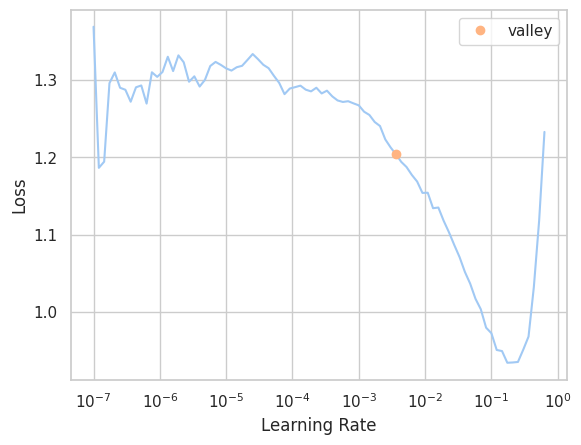

In [39]:
# Neptune callback object
neptune_cbk = NeptuneCallback(run=run)

# Create a fast ai learner and pass the model and NeptuneCallback parameters including the specific run
learner = vision_learner(dls, squeezenet1_1, cbs=[neptune_cbk], metrics=accuracy)

# Find learning rate
lr_rate = learner.lr_find()
base_lr = lr_rate.valley

# Define Early Stopping Callback-function
early_stop_cbk = EarlyStoppingCallback(monitor='valid_loss', patience=2)

# Train the model with optimal number of epochs
learner.fine_tune(epochs=20, base_lr=base_lr, cbs=[early_stop_cbk, neptune_cbk])

run.stop()